# Tutorial Week 5 

This script is a robust example of using R for statistical analysis, emphasizing model fitting, selection, and visualization in biomedical data analysis. It demonstrates how to approach data with complex nonlinear relationships using various statistical modeling techniques to identify the best explanatory model.

This R script is a comprehensive example of data manipulation, statistical modeling, and visualization in the context of analyzing CD4 cell counts across different ages, using the `gamlss` package in R. Here's a detailed breakdown of its components:

1. **Clear Workspace and Load Libraries**: The script starts by clearing the R environment to ensure a fresh workspace and then loads the `gamlss` library, which is essential for fitting generalized additive models for location, scale, and shape.


In [4]:
rm(list=ls())
ls();
library(gamlss);

character(0)

2. **Data Exploration**:
   - The script initially interacts with an `aids` dataset for some basic manipulations, but the main focus is on the `CD4` dataset. It displays the first few entries of the `CD4` data to understand its structure.

In [5]:
data(aids)
head(with(aids,model.matrix(~x+qrt)))

f1<-gl(2,1,24)
levels(f1) <- c("A", "B") 
f1
f2<-gl(3,2,24)
f2
head(model.matrix(~f1*f2), 10)

data(aids)
head(with(aids,model.matrix(formula(~x*qrt))), 10)
#######################################################
data(CD4)
head(CD4)

,(Intercept),x,qrt2,qrt3,qrt4
1,1,1,0,0,0
2,1,2,1,0,0
3,1,3,0,1,0
4,1,4,0,0,1
5,1,5,0,0,0
6,1,6,1,0,0


[1] A B A B A B A B A B A B A B A B A B A B A B A B
Levels: A B

[1] 1 1 2 2 3 3 1 1 2 2 3 3 1 1 2 2 3 3 1 1 2 2 3 3
Levels: 1 2 3

,(Intercept),f1B,f22,f23,f1B:f22,f1B:f23
1,1,0,0,0,0,0
2,1,1,0,0,0,0
3,1,0,1,0,0,0
4,1,1,1,0,1,0
5,1,0,0,1,0,0
6,1,1,0,1,0,1
7,1,0,0,0,0,0
8,1,1,0,0,0,0
9,1,0,1,0,0,0
10,1,1,1,0,1,0


,(Intercept),x,qrt2,qrt3,qrt4,x:qrt2,x:qrt3,x:qrt4
1,1,1,0,0,0,0,0,0
2,1,2,1,0,0,2,0,0
3,1,3,0,1,0,0,3,0
4,1,4,0,0,1,0,0,4
5,1,5,0,0,0,0,0,0
6,1,6,1,0,0,6,0,0
7,1,7,0,1,0,0,7,0
8,1,8,0,0,1,0,0,8
9,1,9,0,0,0,0,0,0
10,1,10,1,0,0,10,0,0


,cd4,age
,<dbl>,<dbl>
1,387,4.50
2,2183,0.83
3,904,2.06
4,1681,1.44
5,656,2.67
6,1191,1.17


3. **Data Visualization**:
   - It uses the `ggplot2` library to create a scatter plot (`pp`) of CD4 cell counts (`cd4`) against age (`age`).

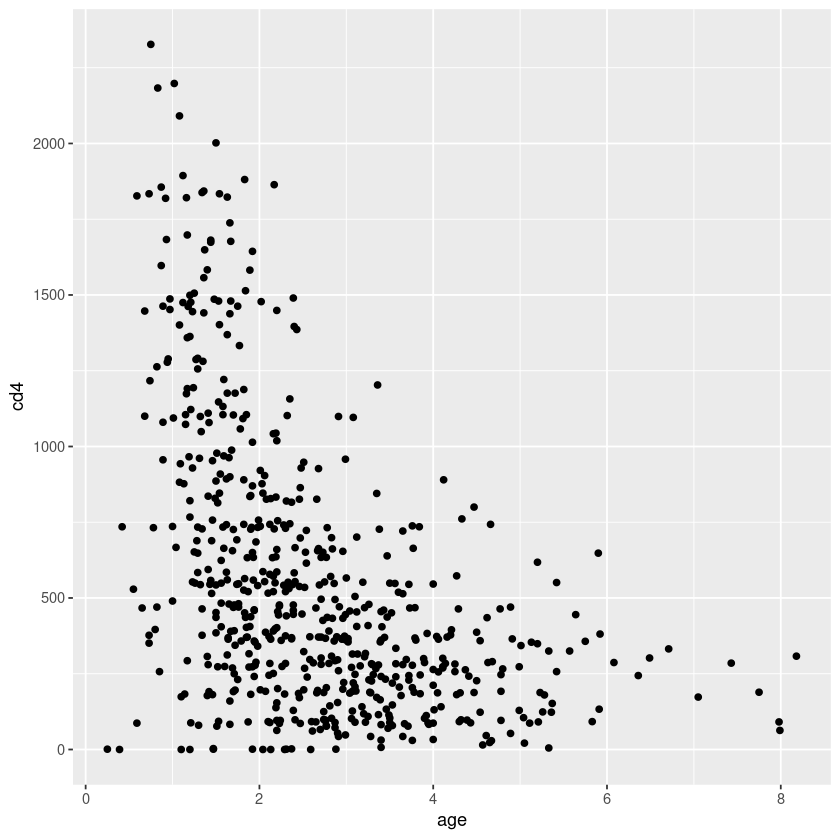

In [7]:
library(ggplot2)

pp<-ggplot(data=CD4, aes(x=age, y=cd4))+geom_point()
pp

4. **Model Fitting**:
   - Various models are fitted to the data to understand the relationship between age and CD4 cell counts. These models include polynomial terms of age (up to the third degree initially), polynomial models with varying degrees, and models using different basis functions for age:
     - Simple polynomial terms (`age`, `age^2`, `age^3`).
     - Orthogonal polynomials (`poly(age, degree)`).
     - Flexible polynomials using penalization (`fp(age, degree)`).
     - B-splines (`bs(age, df=degree)`).
     - Penalized B-splines (`pb(age)`).
     - Fractional polynomials (`fk(age, degree)`).

GAMLSS-RS iteration 1: Global Deviance = 8983.351 
GAMLSS-RS iteration 2: Global Deviance = 8983.351 


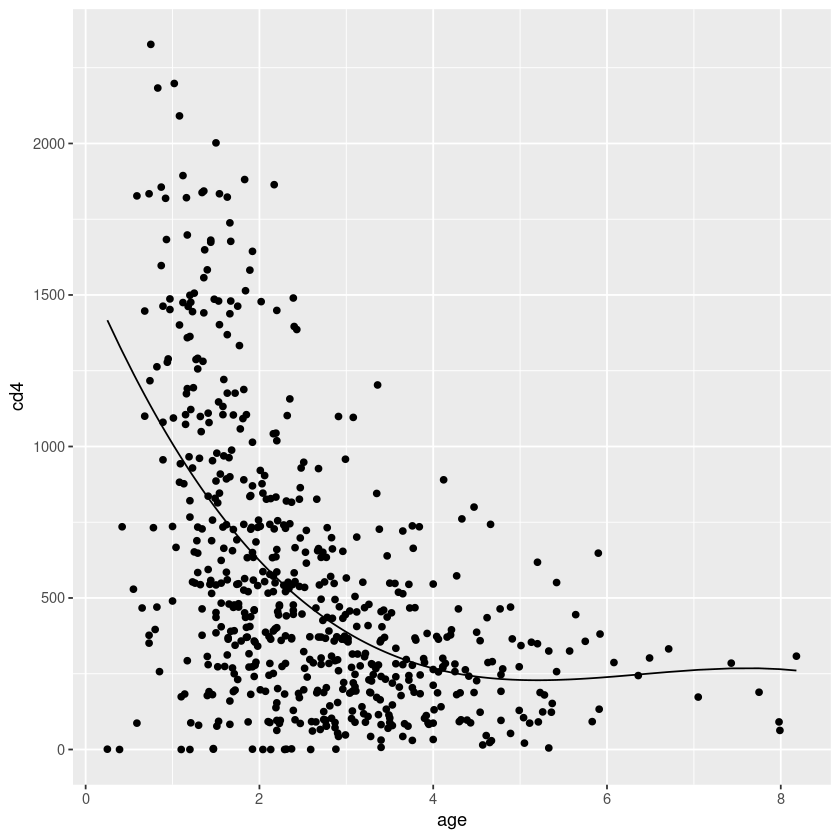

In [18]:
#  Simple polynomial terms (`age`, `age^2`, `age^3`).
m0 <- gamlss(cd4~age+I(age^2)+I(age^3), data=CD4)

pp1<- pp+geom_line(aes(x=age, y=fitted(m0)))

pp1

GAMLSS-RS iteration 1: Global Deviance = 8983.351 
GAMLSS-RS iteration 2: Global Deviance = 8983.351 


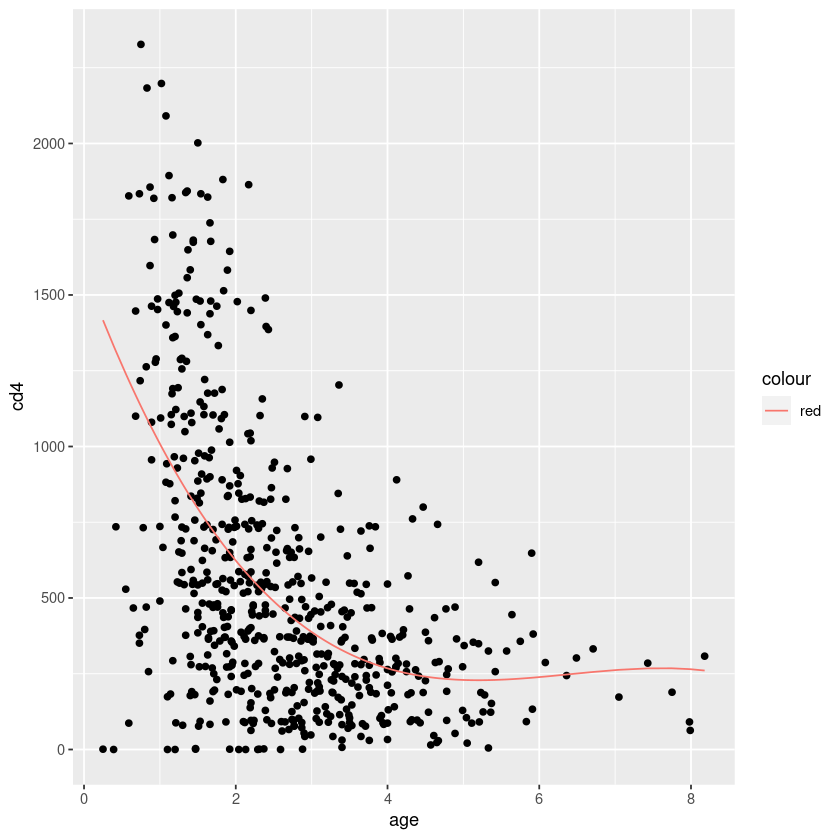

In [19]:
# Orthogonal polynomials (`poly(age, degree)`).
m1 <- gamlss(cd4~poly(age,3), data=CD4)

pp+geom_line(aes(x=age, y=fitted(m1), col="red"))

5. **Model Comparison**:
   - The script compares these models using the Akaike Information Criterion (AIC) to select the best-fitting model based on the trade-off between model complexity and goodness of fit.

In [20]:
# Orthogonal polynomials (`poly(age, degree)`).
l1 <- gamlss(cd4~poly(age,1), data=CD4)
l2 <- gamlss(cd4~poly(age,2), data=CD4)
l3 <- gamlss(cd4~poly(age,3), data=CD4)
l4 <- gamlss(cd4~poly(age,4), data=CD4)
l5 <- gamlss(cd4~poly(age,5), data=CD4)
l6 <- gamlss(cd4~poly(age,6), data=CD4)
l7 <- gamlss(cd4~poly(age,7), data=CD4)
l8 <- gamlss(cd4~poly(age,8), data=CD4)
l9 <- gamlss(cd4~poly(age,9), data=CD4)

AIC(l1, l2, l3,l4, l5,l6,l7,l8,l9)
AIC(l1, l2, l3,l4, l5,l6,l7,l8,l9, k=log(dim(CD4)[1]))

GAMLSS-RS iteration 1: Global Deviance = 9038.145 
GAMLSS-RS iteration 2: Global Deviance = 9038.145 
GAMLSS-RS iteration 1: Global Deviance = 8987.636 
GAMLSS-RS iteration 2: Global Deviance = 8987.636 
GAMLSS-RS iteration 1: Global Deviance = 8983.351 
GAMLSS-RS iteration 2: Global Deviance = 8983.351 
GAMLSS-RS iteration 1: Global Deviance = 8976.105 
GAMLSS-RS iteration 2: Global Deviance = 8976.105 
GAMLSS-RS iteration 1: Global Deviance = 8963.383 
GAMLSS-RS iteration 2: Global Deviance = 8963.383 
GAMLSS-RS iteration 1: Global Deviance = 8952.637 
GAMLSS-RS iteration 2: Global Deviance = 8952.637 
GAMLSS-RS iteration 1: Global Deviance = 8945.263 
GAMLSS-RS iteration 2: Global Deviance = 8945.263 
GAMLSS-RS iteration 1: Global Deviance = 8943.874 
GAMLSS-RS iteration 2: Global Deviance = 8943.874 
GAMLSS-RS iteration 1: Global Deviance = 8942.662 
GAMLSS-RS iteration 2: Global Deviance = 8942.662 


,df,AIC
,<dbl>,<dbl>
l7,9,8963.263
l8,10,8963.874
l9,11,8964.662
l6,8,8968.637
l5,7,8977.383
l4,6,8988.105
l3,5,8993.351
l2,4,8995.636
l1,3,9044.145


,df,AIC
,<dbl>,<dbl>
l7,9,9002.969
l6,8,9003.932
l8,10,9007.992
l5,7,9008.266
l9,11,9013.192
l2,4,9013.284
l4,6,9014.576
l3,5,9015.410
l1,3,9057.380


6. **Visualization of Model Fits**:
   - It then overlays the fitted models on the scatter plot created earlier to visually compare how well each model fits the data. This is done through lines representing the fitted values from each model against age, with different models possibly colored differently for distinction.

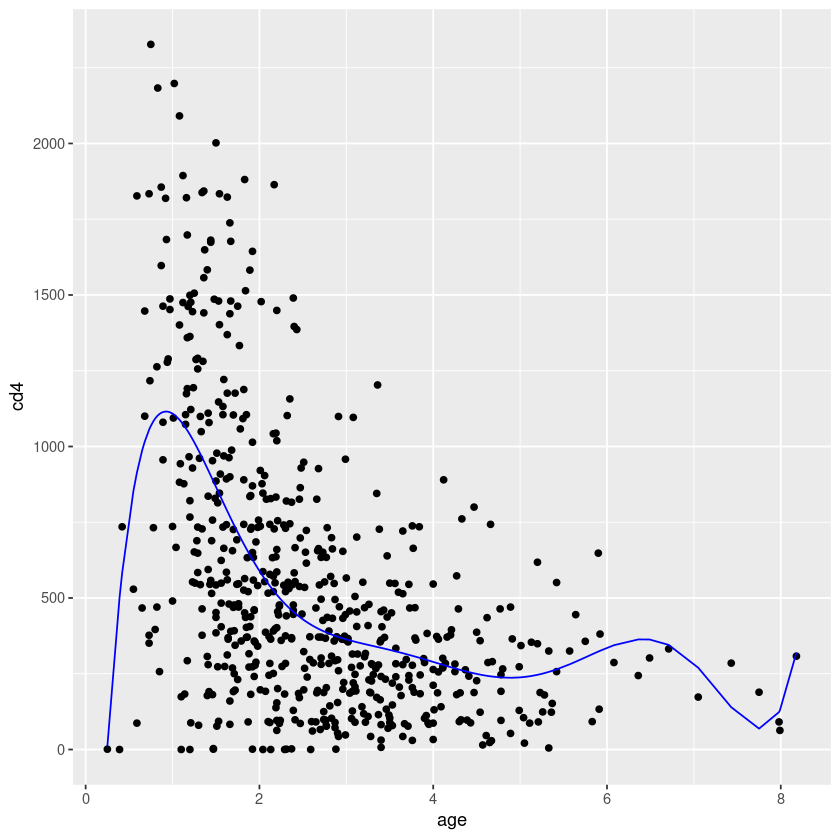

In [21]:
pp+geom_line(aes(x=age, y=fitted(l7)), col="blue")

GAMLSS-RS iteration 1: Global Deviance = 9007.321 
GAMLSS-RS iteration 2: Global Deviance = 9007.321 
GAMLSS-RS iteration 1: Global Deviance = 8966.469 
GAMLSS-RS iteration 2: Global Deviance = 8966.469 
GAMLSS-RS iteration 1: Global Deviance = 8950.375 
GAMLSS-RS iteration 2: Global Deviance = 8950.375 


,df,AIC
,<dbl>,<dbl>
fp_3,8,8966.375
fp_2,6,8978.469
fp_1,4,9015.321


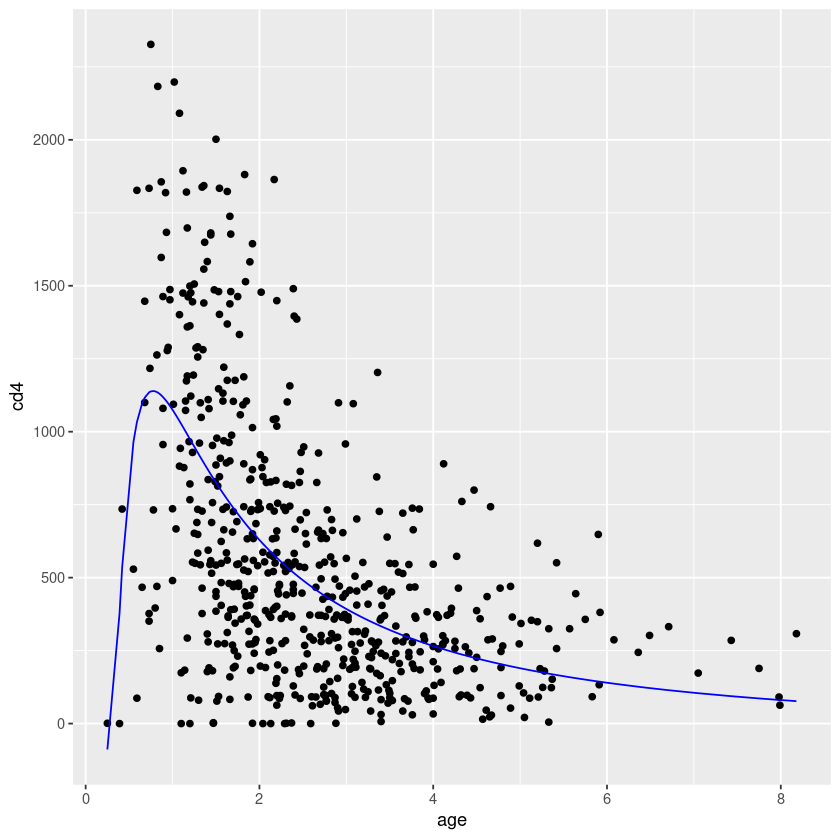

In [22]:
# Flexible polynomials using penalization (`fp(age, degree)`).
fp_1<- gamlss(cd4~fp(age,1), data=CD4)
fp_2<- gamlss(cd4~fp(age,2), data=CD4)
fp_3<- gamlss(cd4~fp(age,3), data=CD4)
AIC(fp_1, fp_2, fp_3)

pp+geom_line(aes(x=age, y=fitted(fp_3)), col="blue")

GAMLSS-RS iteration 1: Global Deviance = 8974.558 
GAMLSS-RS iteration 2: Global Deviance = 8974.558 


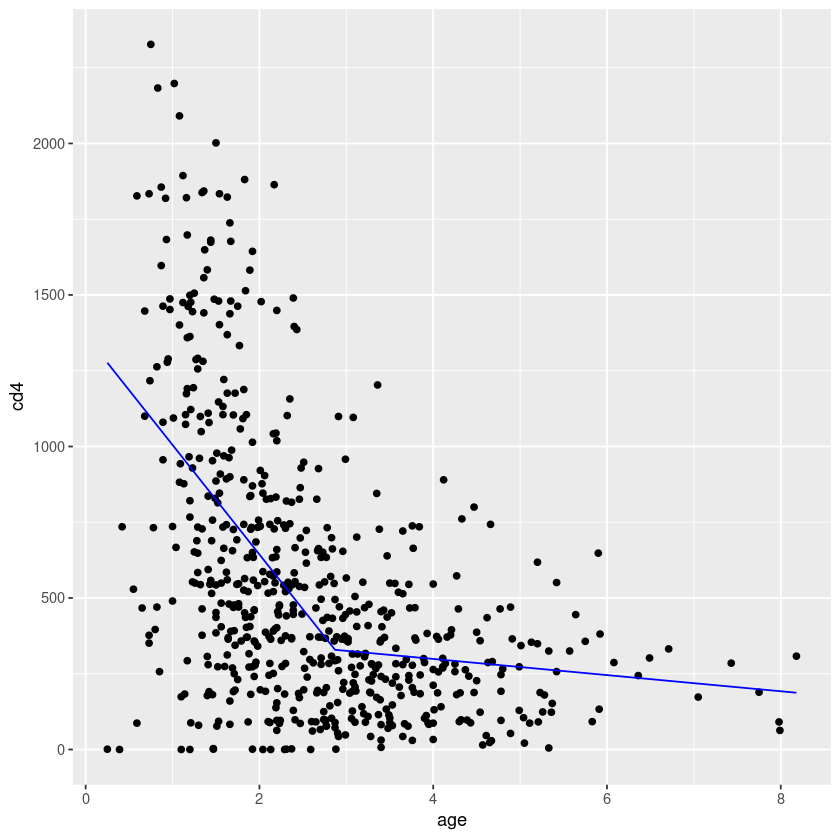

In [13]:
library(gamlss.add)
# Fractional polynomials (`fk(age, degree)`).
fk_1<- gamlss(cd4~fk(age,1), data=CD4)
pp+geom_line(aes(x=age, y=fitted(fk_1)), col="blue")

GAMLSS-RS iteration 1: Global Deviance = 8983.351 
GAMLSS-RS iteration 2: Global Deviance = 8983.351 
GAMLSS-RS iteration 1: Global Deviance = 8965.475 
GAMLSS-RS iteration 2: Global Deviance = 8965.475 
GAMLSS-RS iteration 1: Global Deviance = 8950.022 
GAMLSS-RS iteration 2: Global Deviance = 8950.022 
GAMLSS-RS iteration 1: Global Deviance = 8944.353 
GAMLSS-RS iteration 2: Global Deviance = 8944.353 
GAMLSS-RS iteration 1: Global Deviance = 8941.519 
GAMLSS-RS iteration 2: Global Deviance = 8941.519 
GAMLSS-RS iteration 1: Global Deviance = 8941.073 
GAMLSS-RS iteration 2: Global Deviance = 8941.073 
GAMLSS-RS iteration 1: Global Deviance = 8941.014 
GAMLSS-RS iteration 2: Global Deviance = 8941.014 


,df,AIC
,<dbl>,<dbl>
b7,9,8959.519
b6,8,8960.353
b8,10,8961.073
b9,11,8963.014
b5,7,8964.022
b4,6,8977.475
b3,5,8993.351


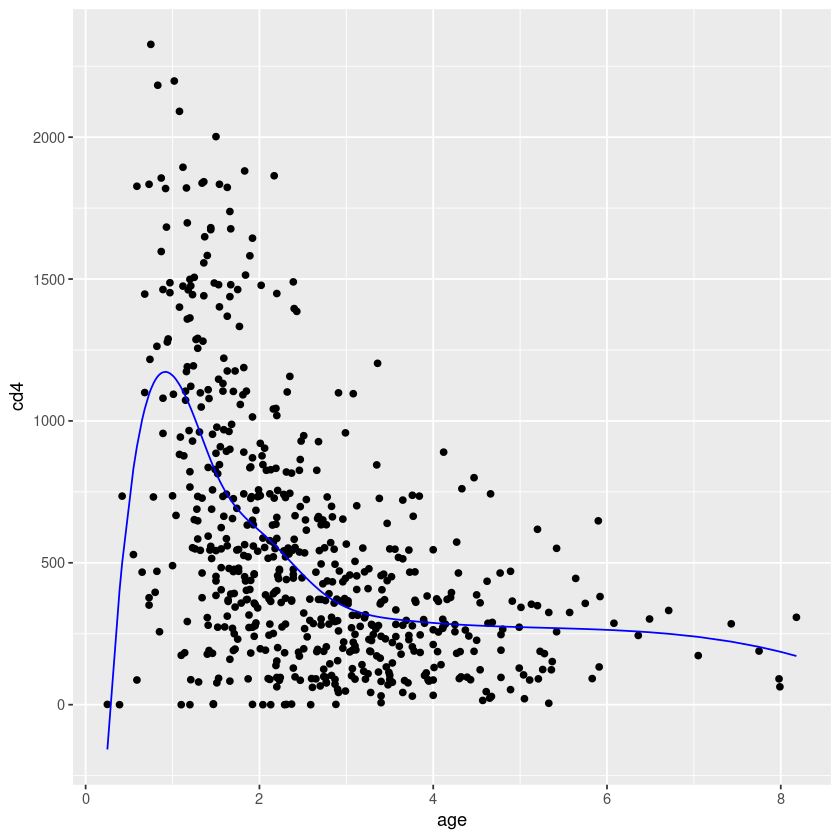

In [14]:
# B-splines (`bs(age, df=degree)`).
b3 <- gamlss(cd4~bs(age,df=3), data=CD4)
b4 <- gamlss(cd4~bs(age,df=4), data=CD4)
b5 <- gamlss(cd4~bs(age,df=5), data=CD4)
b6 <- gamlss(cd4~bs(age,df=6), data=CD4)
b7 <- gamlss(cd4~bs(age,df=7), data=CD4)
b8 <- gamlss(cd4~bs(age,df=8), data=CD4)
b9 <- gamlss(cd4~bs(age,df=9), data=CD4)
AIC(b3,b4,b5,b6,b7,b8,b9)

pp+geom_line(aes(x=age, y=fitted(b7)), col="blue")

GAMLSS-RS iteration 1: Global Deviance = 8954.519 
GAMLSS-RS iteration 2: Global Deviance = 8954.312 
GAMLSS-RS iteration 3: Global Deviance = 8954.309 
GAMLSS-RS iteration 4: Global Deviance = 8954.309 


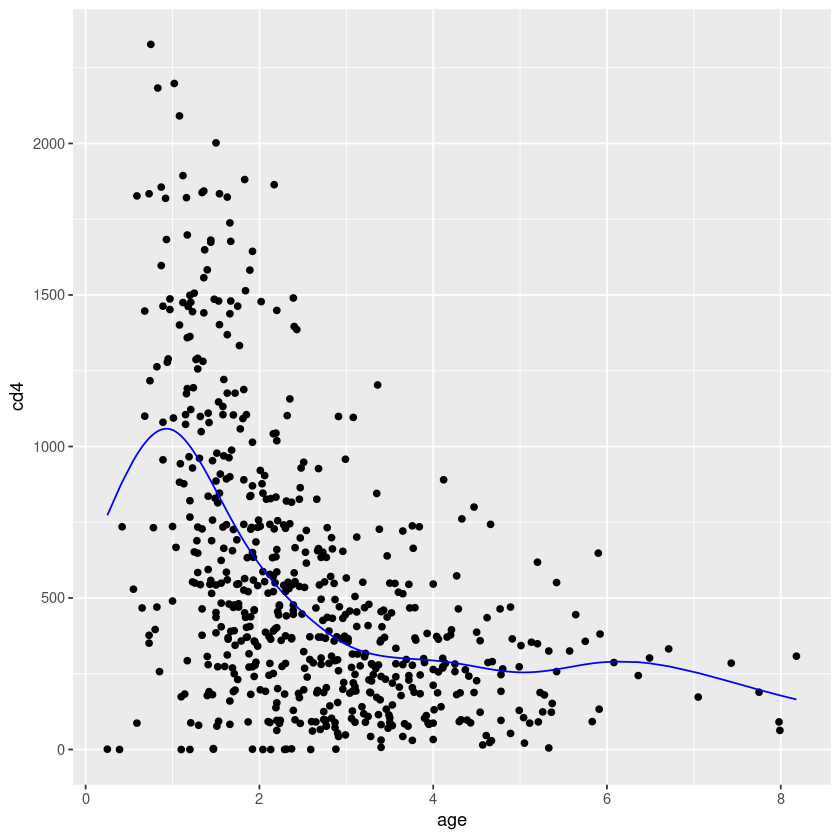

In [15]:
# Penalized B-splines (`pb(age)`).
c1 <- gamlss(cd4~pb(age), data=CD4)
pp+geom_line(aes(x=age, y=fitted(c1)), col="blue")

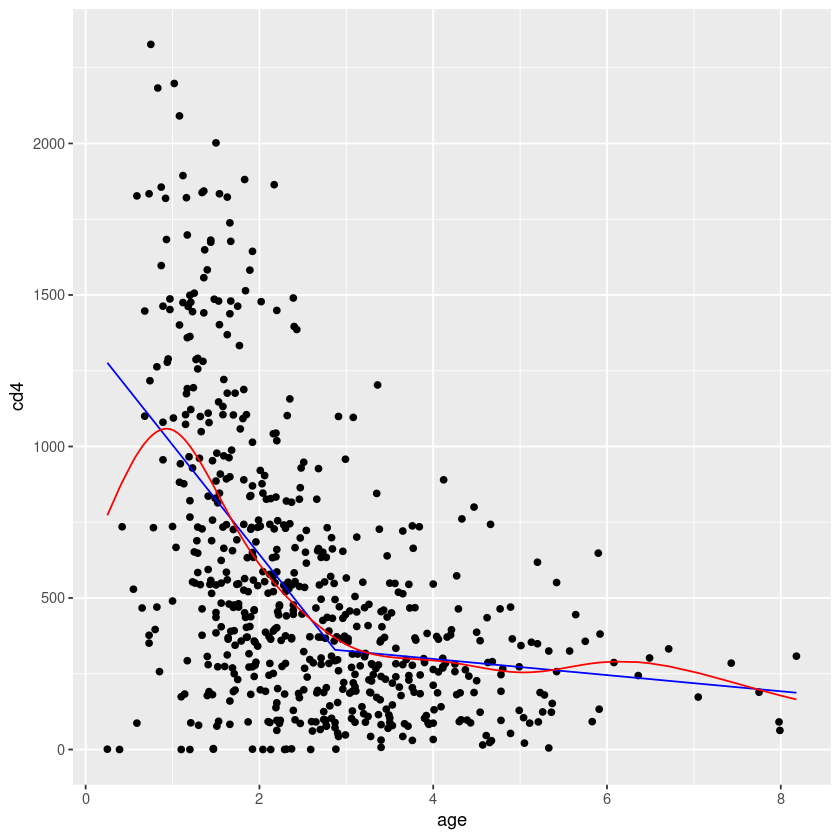

In [16]:
# fk_1: Fractional polynomials (`fk(age, degree=1)`).
# c1: Penalized B-splines (`pb(age)`).
pp+
    geom_line(aes(x=age, y=fitted(fk_1)), col="blue")+
    geom_line(aes(x=age, y=fitted(c1)), col="red")

7. **Advanced Modeling Techniques**:
   - The script explores advanced modeling techniques, such as using fractional polynomials and B-splines to capture the relationship between age and CD4 counts more flexibly and accurately.

This script is a robust example of using R for statistical analysis, emphasizing model fitting, selection, and visualization in biomedical data analysis. It demonstrates how to approach data with complex nonlinear relationships using various statistical modeling techniques to identify the best explanatory model.